Maria Jose Rueda Montes

# Data Processing

In [1]:
# Import Python packages.

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Import the Motion-Capture-Based Hand Gesture Recognition dataset.

df_p = pd.read_csv('data/postures_clean.csv')
print(df_p.head())

   Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0   0.000000   0.000000   0.000000  ...   0  0  0  0   0   0   0   0   0   0  
1 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]


In [3]:
# Check some initial statistics.

print(df_p.describe())

              Class          User            X0            Y0            Z0  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean       2.983738      7.959127     50.345664     85.812051    -29.984712   
std        1.421183      4.697810     32.696173     40.204363     34.361918   
min        0.000000      0.000000   -108.552738    -98.233756   -126.770872   
25%        2.000000      5.000000     29.295062     63.494432    -56.356438   
50%        3.000000      9.000000     54.619964     86.526246    -30.864125   
75%        4.000000     12.000000     72.488686    113.107355     -1.418803   
max        5.000000     14.000000    190.017835    169.175464    113.345119   

                 X1            Y1            Z1            X2            Y2  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean      49.595209     86.192647    -29.509202     48.612121     83.771315   
std       32.478238     40.453214     34.764398    

In [4]:
# Print the featurers.

print(df_p.columns.values)

# The dataset has a total of 36 features.

['Class' 'User' 'X0' 'Y0' 'Z0' 'X1' 'Y1' 'Z1' 'X2' 'Y2' 'Z2' 'X3' 'Y3'
 'Z3' 'X4' 'Y4' 'Z4' 'X5' 'Y5' 'Z5' 'X6' 'Y6' 'Z6' 'X7' 'Y7' 'Z7' 'X8'
 'Y8' 'Z8' 'X9' 'Y9' 'Z9' 'X10' 'Y10' 'Z10' 'X11' 'Y11' 'Z11']


In [5]:
# First we remove the row composed by zeros.

df_p = df_p[1:]

In [6]:
# We need to handle the missing values.

df_p = df_p.replace('?', np.NaN)
print('Are there missing values?: ', df_p.isna().any().any())

Are there missing values?:  True


In [7]:
# Print the missing values of each feature.

print(df_p.isna().sum())

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64


In [8]:
# We can remove the last 12 colums since the most of the values are missing.

df_p.drop(labels = ['X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'], axis = 1, inplace = True)

# Now we have 24 features.

In [13]:
# Save the data with Class and User labels.
df_labels = df_p[['Class', 'User']].to_numpy()
df_labels = pd.DataFrame(df_labels)
df_labels.columns = ['Class', 'User']

In [15]:
# Finish cleaning the data by removing the label values.
df_p.drop(labels = ['Class', 'User'], axis = 1, inplace = True)

In [16]:
# We have two different options: remove rows with missing values or impute missing values.
# For avoiding the insufficiency in the data and due to the great difference between the missing 
# values for each feature, we opted for the option of replacing the missing values using k-NN technique. 

from sklearn.impute import KNNImputer
# The missing values are changed by KNN-imputer.
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
df_p = imputer.fit_transform(df_p)
df_p = pd.DataFrame(df_p)

In [17]:
print('Are there missing values?: ', df_p.isna().any().any())

Are there missing values?:  False


In [18]:
# Check if the data is correct.

print(df_p.head())

          0          1          2          3          4          5   \
0  54.263880  71.466776 -64.807709  76.895635  42.462500 -72.780545   
1  56.527558  72.266609 -61.935252  39.135978  82.538530 -49.596509   
2  55.849928  72.469064 -62.562788  37.988804  82.631347 -50.606259   
3  55.329647  71.707275 -63.688956  36.561863  81.868749 -52.752784   
4  55.142401  71.435607 -64.177303  36.175818  81.556874 -53.475747   

          6          7          8          9   ...         14         15  \
0  36.621229  81.680557 -52.919272  85.232264  ... -71.297781  12.213229   
1  79.223743  43.254091 -69.982489  87.450873  ... -68.827418  29.057381   
2  78.451526  43.567403 -70.658489  86.835388  ... -68.889316  29.057381   
3  86.320630  68.214645 -72.228461  61.596157  ... -72.015146  39.122128   
4  76.986143  42.426849 -72.574743  86.368748  ... -69.279906  29.057381   

          16         17         18         19         20         21  \
0  73.339910 -47.375685   7.911238  74.530825

## Scaling the Values and PCA

In [19]:
# Since we have a lot of features, we perform PCA to make the data easier to manage by the models. 
# Furthermore, with this technique we can solve problems in some of the algorithms, such as K-means, 
# where in very high-dimensional spaces, Euclidean distances tend to inflate. In addition, with PCA we increase
# the computation speed.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
pca = PCA()

# Data without Scaling and PCA.
df_postures = df_p

# Scaling data and PCA. 
scal_df = scale.fit_transform(df_p)
pca_df = pca.fit_transform(scal_df)

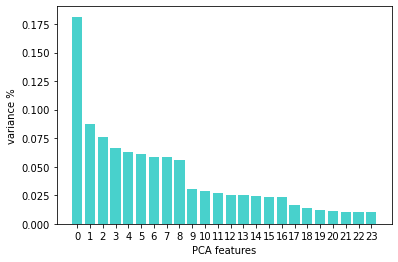

In [20]:
# We can plot the main components that suppose a better description of the data, that is, 
# the components that explain the majority of the variance. 

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='mediumturquoise')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

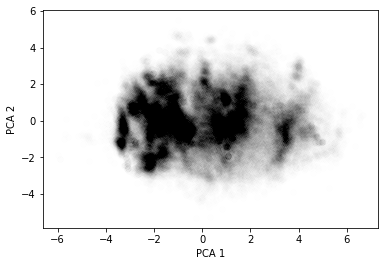

In [21]:
# By plotting the two main components, we can see if there is a well-differentiated cluster in the data.

plt.scatter(pca_df[:, 0], pca_df[:, 1],  alpha=.005, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# As we can see in the plot, This data is going to be difficult to group, since there are 
# no highly differentiable clusters, although with effort we could distinguish 2 groups of data, 
# that is, 2 clusters.

In [22]:
# In this way, for the optimal number of principal components we can choose the 3 first components.
pca_df = pca_df[:, 0:2]

# Clustering methods 

## K-means

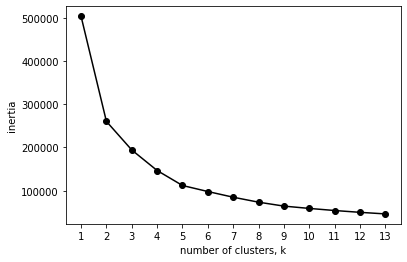

In [210]:
# To determine the number of clusters that we must select for k-means, we can use the 
# sum of the squared distances to the nearest cluster center aka inertia. The following plot 
# shows the percentage of variance as a function of the number of clusters.

ks = range(1, 14)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters.
    model = KMeans(n_clusters=k)
    
    # Fit model to the data.
    model.fit(pca_df)
    
    # Append the inertia to the list of inertias.
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [211]:
# From the plot we can see how after forming 4 clusters the line stabilizes. 
# So we are going to choose 4 as the cluster number, discarding the rest.
n_clusters=4

In [212]:
# Implementing K-means algorithm

from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters, random_state=0).fit(pca_df)

In [213]:
# For the evaluation we define the true labels and the labels predicted by the model (K-means)

# We use the labels of Class since we are using 4 number os clusters which is the number of
# postures that is in the column of class. This is the closest label. 
df_class = df_labels['Class'].to_numpy()
labels_true = df_class
# Predict the labels with the algorithm
labels = kmeans.labels_

In [214]:
# Evaluation Metrics 

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Fowlkes-Mallows scores: %0.3f"
      % metrics.fowlkes_mallows_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_df, labels)) 

Homogeneity: 0.226
Completeness: 0.265
V-measure: 0.244
Fowlkes-Mallows scores: 0.389
Silhouette Coefficient: 0.353


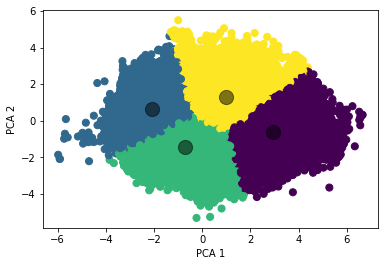

In [215]:
# Plot the results 

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Agglomerative Single-Link Clustering Algorithm

In [216]:
# The function for plotting the denogram.

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [217]:
# Implementing Aglomerative single-link algorithm

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'single').fit(pca_df)

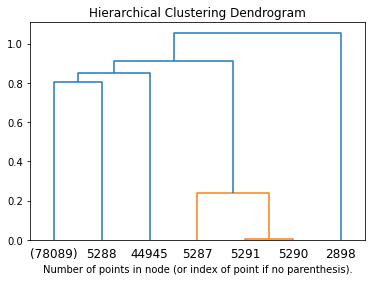

In [218]:
# Plot the algorithm 
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# With the drenogram we can analyze the optimal number of clusters.

In [219]:
# After analyzing the number of clusters required, we can rerun the algorithm specifying this parameter.

clustering = AgglomerativeClustering(n_clusters=5, linkage = 'single').fit(pca_df)

df_class = df_labels['Class'].to_numpy()

labels_true = df_class
labels = clustering.labels_

In [220]:
# Evaluation Metrics 

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Fowlkes-Mallows scores: %0.3f"
      % metrics.fowlkes_mallows_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_df, labels)) 

Homogeneity: 0.000
Completeness: 0.140
V-measure: 0.000
Fowlkes-Mallows scores: 0.448
Silhouette Coefficient: 0.210


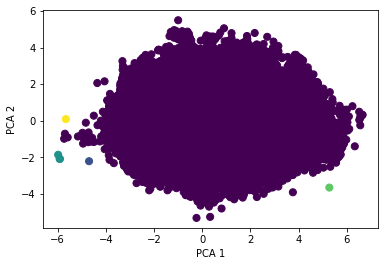

In [188]:
# Plot the results 

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## DBSCAN

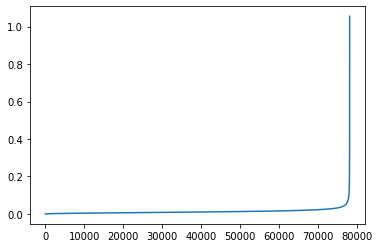

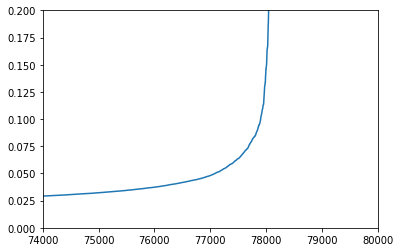

In [221]:
# Find the best parameters (epsilon and MinPts)

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.show()

# Zoom the plot
plt.gca().set_xlim([74000, 80000])
plt.gca().set_ylim([0, 0.2])
plt.plot(distances)
plt.show()

In [222]:
# Implementing DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

labels_true = df_labels['Class'].to_numpy()

# Compute DBSCAN
db = DBSCAN(eps=0.075, min_samples=48).fit(pca_df) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 48
Estimated number of noise points: 34013


In [223]:
# Evaluation Metrics 

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Fowlkes-Mallows scores: %0.3f"
      % metrics.fowlkes_mallows_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_df, labels)) 

Homogeneity: 0.169
Completeness: 0.161
V-measure: 0.165
Fowlkes-Mallows scores: 0.303
Silhouette Coefficient: -0.555


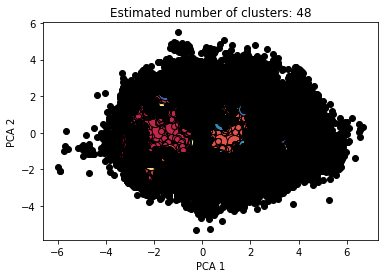

In [192]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Mean-Shift

In [224]:
# Compute clustering with MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pca_df, quantile=0.2, n_samples=50)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_df)
cluster_centers = ms.cluster_centers_

labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


In [230]:
# For the evaluation we define the true labels and the labels predicted by the model

labels_true = df_class

In [231]:
# Evaluation Metrics 

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Fowlkes-Mallows scores: %0.3f"
      % metrics.fowlkes_mallows_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_df, labels)) 

Homogeneity: 0.157
Completeness: 0.368
V-measure: 0.220
Fowlkes-Mallows scores: 0.449
Silhouette Coefficient: 0.400


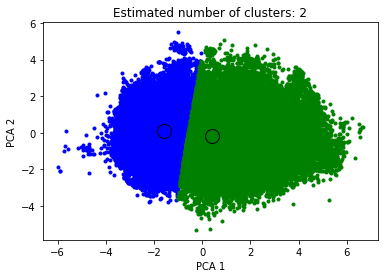

In [194]:
# Plot result

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(pca_df[my_members, 0], pca_df[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Supervised Algorithm

In [267]:
# Separate data and labels

X = scal_df
Y = df_labels['Class'].to_numpy()

In [268]:
# Split the data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.80, shuffle = True)

In [269]:
# Support Vector Machinne method as supervised algorithm
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

In [270]:
# Accuracy

metrics.accuracy_score(Y_test, Y_pred)

0.9388885331967476